In [88]:
import pandas as pd
import numpy as np
from pathlib import Path

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

import seaborn as sns

In [90]:
from matplotlib import style

## Loading orignal data

In [91]:
df = pd.read_csv("vehicles.csv")

In [92]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [93]:
print(df.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [94]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [95]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [96]:
# Drop columns that is not needed (Please select whatever columns we would not need)
df_columns = df.drop(columns=['url','region_url','VIN','paint_color','image_url','description','county','lat','long','posting_date'])

In [97]:
# Remove rows with NA data
ucs_df = df_columns.dropna()

In [98]:
ucs_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,al
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,al
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,al
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,al
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,7302963673,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,wy
426809,7302963273,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,wy
426831,7302384818,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,wy
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,wy


In [99]:
# Check 'cylinders' column
cylinders_count = ucs_df.cylinders.value_counts()
cylinders_count

6 cylinders     28062
4 cylinders     27056
8 cylinders     24931
10 cylinders      802
5 cylinders       738
other             257
3 cylinders       162
12 cylinders       43
Name: cylinders, dtype: int64

In [100]:
# Preprocess 'cylinders' column - Remove 'cylinders'
ucs_df['cylinders'] = ucs_df['cylinders'].str.replace(' cylinders','')

C:\Users\shahl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
# Preprocess 'cylinders' column - Remove 'other'
ucs_df['cylinders'] = ucs_df['cylinders'].str.replace('other','0')

C:\Users\shahl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [102]:
# Assign data type
ucs_df['cylinders'].astype('float64')

31        6.0
55        8.0
59        6.0
65        8.0
73        8.0
         ... 
426808    8.0
426809    8.0
426831    6.0
426833    8.0
426836    6.0
Name: cylinders, Length: 82051, dtype: float64

In [103]:
# Check 'cylinders' column
cylinders_count = ucs_df.cylinders.value_counts()
cylinders_count

6     28062
4     27056
8     24931
10      802
5       738
0       257
3       162
12       43
Name: cylinders, dtype: int64

In [104]:
ucs_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,full-size,truck,al
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8,diesel,88000.0,clean,automatic,4wd,full-size,pickup,al
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6,gas,95000.0,clean,automatic,fwd,full-size,mini-van,al
65,7312847466,auburn,22500,2001.0,ford,f450,good,8,diesel,144700.0,clean,manual,rwd,full-size,truck,al
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,7302963673,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8,gas,130000.0,lien,automatic,4wd,full-size,truck,wy
426809,7302963273,wyoming,18000,1990.0,jeep,gand wagoneer,good,8,gas,114400.0,clean,automatic,4wd,full-size,SUV,wy
426831,7302384818,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,wy
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8,gas,69550.0,clean,automatic,rwd,compact,convertible,wy


In [105]:
# removing decimal from year column
ucs_df['year'] = (ucs_df['year']).astype(int) 

C:\Users\shahl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [106]:
ucs_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,full-size,truck,al
55,7314560853,auburn,19900,2004,ford,f250 super duty,good,8,diesel,88000.0,clean,automatic,4wd,full-size,pickup,al
59,7313406529,auburn,14000,2012,honda,odyssey,excellent,6,gas,95000.0,clean,automatic,fwd,full-size,mini-van,al
65,7312847466,auburn,22500,2001,ford,f450,good,8,diesel,144700.0,clean,manual,rwd,full-size,truck,al
73,7312144944,auburn,15000,2017,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,al


In [108]:
# normal = np.random.normal(0, 1, 10000) # loc, scale, size
# quartiles = pd.ucs_df(normal).quantile([0.25, 0.5, 0.75, 1])[0]
# fig, axs = plt.subplots(nrows=2)
# fig.set_size_inches(14, 8)
# # Boxplot of Normal distribution
# plot1 = sns.boxplot(normal, ax=axs[0])
# plot1.set(xlim=(-4, 4))
# # Normal distribution
# plot2 = sns.distplot(normal, ax=axs[1])
# plot2.set(xlim=(-4, 4))
# # Median line
# plt.axvline(np.median(normal), color='r', linestyle='dashed', linewidth=2)
# for i, q in enumerate(quartiles):
#     # Quartile i line
#     plt.axvline(q, color='g', linestyle='dotted', linewidth=2)

<AxesSubplot:xlabel='state', ylabel='price'>

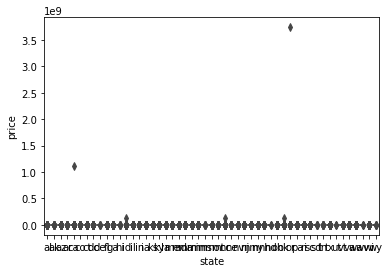

In [49]:
sns.boxplot(data=ucs_df, x="state", y="price")

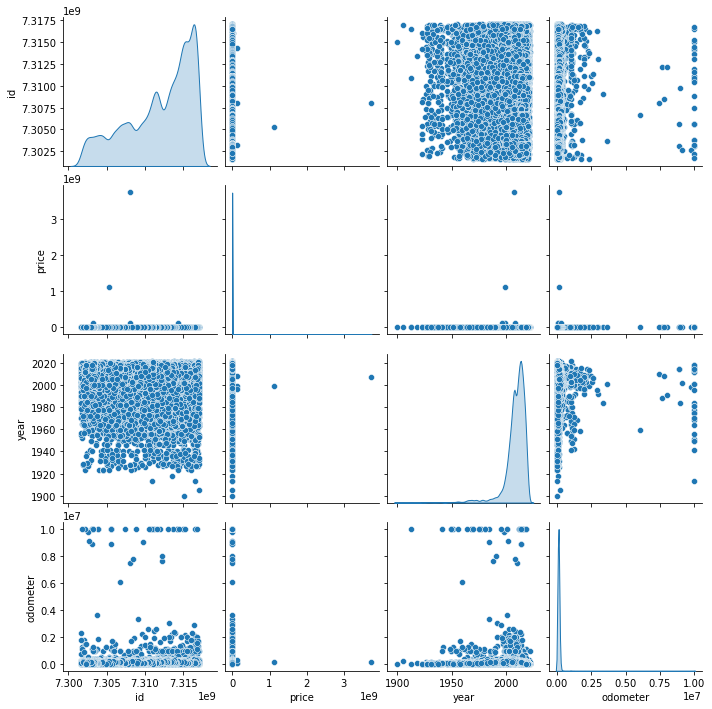

In [50]:
sns.pairplot(data = ucs_df, diag_kind = 'kde')

In [51]:
fuel = ucs_df["fuel"]
price = ucs_df["price"]
transmission = ucs_df["transmission"]
year = ucs_df["year"]

In [52]:
# plt.style.use("ggplot")
# fig = plt.figure(figsize = (15, 5))
# ax2 = plt.axes()
# #fig.subtitle("Visualizing categorical data columns")
# plt.subplot(1,3,1)
# plt.bar(fuel,price, color= "royalblue")
# plt.xlabel("fuel")
# plt.ylabel("price")
# plt.subplot(1,3,2)
# plt.bar(transmission,price, color= "red")
# plt.xlabel("transmission")

# plt.subplot(1,3,3)
# plt.bar(year,price, color= "purple")
# plt.xlabel("year")

# plt.show()

In [125]:
lower_limit = np.percentile(ucs_df[['price']], 5)
upper_limit = np.percentile(ucs_df[['price']], 95)
print(lower_limit, upper_limit)

2700.0 18976.699999999997


In [126]:
ucs_df = ucs_df[(ucs_df['price'] >= lower_limit) & (ucs_df['price'] <= upper_limit)]  #Removing outliers
ucs_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,0,automatic,rwd,full-size,truck,al
59,7313406529,auburn,14000,2012,honda,odyssey,excellent,6,gas,95000.0,0,automatic,fwd,full-size,mini-van,al
73,7312144944,auburn,15000,2017,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,4,automatic,rwd,mid-size,sedan,al
86,7310644616,auburn,3000,2004,chrysler,town & country,good,6,gas,176144.0,0,automatic,fwd,mid-size,mini-van,al
110,7307730503,auburn,9500,2003,chrysler,town & country,excellent,6,gas,30376.0,0,automatic,fwd,mid-size,mini-van,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,7303112347,wyoming,15999,2018,chevrolet,"cruze, lt",excellent,4,gas,36465.0,0,automatic,fwd,mid-size,sedan,wy
426808,7302963673,wyoming,18000,2005,chevrolet,silverado 1500 lt 4x4,excellent,8,gas,130000.0,1,automatic,4wd,full-size,truck,wy
426809,7302963273,wyoming,18000,1990,jeep,gand wagoneer,good,8,gas,114400.0,0,automatic,4wd,full-size,SUV,wy
426831,7302384818,wyoming,9800,1985,nissan,300zx coupe with t-tops,like new,6,gas,115000.0,0,automatic,rwd,sub-compact,hatchback,wy


In [127]:
label_encoder = preprocessing.LabelEncoder()
ucs_df['title_status'] = label_encoder.fit_transform(ucs_df['title_status'])

C:\Users\shahl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
ucs_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,0,automatic,rwd,full-size,truck,al
59,7313406529,auburn,14000,2012,honda,odyssey,excellent,6,gas,95000.0,0,automatic,fwd,full-size,mini-van,al
73,7312144944,auburn,15000,2017,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,4,automatic,rwd,mid-size,sedan,al
86,7310644616,auburn,3000,2004,chrysler,town & country,good,6,gas,176144.0,0,automatic,fwd,mid-size,mini-van,al
110,7307730503,auburn,9500,2003,chrysler,town & country,excellent,6,gas,30376.0,0,automatic,fwd,mid-size,mini-van,al


## DecisionTreeRegressor

In [129]:
# Select columns for analysis
df_test = ucs_df.loc[:,['price','cylinders','odometer']]

In [130]:
df_test

,price,cylinders,odometer
31,15000,6,128000.0
59,14000,6,95000.0
73,15000,8,90000.0
86,3000,6,176144.0
110,9500,6,30376.0
...,...,...,...
426793,15999,4,36465.0
426808,18000,8,130000.0
426809,18000,8,114400.0
426831,9800,6,115000.0


In [131]:
# Create features and target
X = df_test.copy().drop('price',axis=1)
y = df_test['price']

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [133]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [134]:
# Create model
regr = DecisionTreeRegressor()

In [135]:
# Fit model
regr.fit(X_train, y_train)

DecisionTreeRegressor()

In [136]:
# Make prediction
y_pred = regr.predict(X_test)

In [137]:
# Result of prediction
data = {'price': y_test,
       'prediction': y_pred}
df_pred = pd.DataFrame(data)

In [138]:
df_pred

,price,prediction
213838,9999,10951.000000
110656,7500,5479.525000
282613,3800,5966.258427
236638,3950,5107.500000
309452,5395,5395.000000
...,...,...
183985,4500,7306.362637
68308,2750,4150.000000
245801,12200,13999.000000
295378,2950,4000.000000


In [139]:
# R squared Error
error_score = metrics.r2_score(y_test, y_pred)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.11577448272203317


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

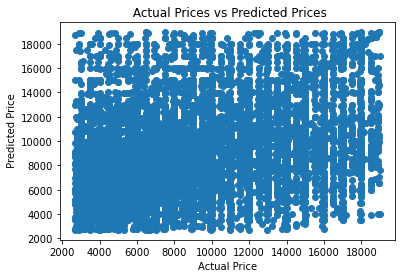

In [141]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [142]:
# df_columns_drop.to_csv("vehicles_processed.csv")

## Linear Regression Model

In [143]:
# Select columns for analysis
df_test2 = ucs_df.loc[:,['price','year','odometer','title_status']]
df_test2

,price,year,odometer,title_status
31,15000,2013,128000.0,0
59,14000,2012,95000.0,0
73,15000,2017,90000.0,4
86,3000,2004,176144.0,0
110,9500,2003,30376.0,0
...,...,...,...,...
426793,15999,2018,36465.0,0
426808,18000,2005,130000.0,1
426809,18000,1990,114400.0,0
426831,9800,1985,115000.0,0



### Split the Data into Training and Target

In [144]:
# Create our features
X = df_test2
X=X.drop(["price"],axis=1)
X=pd.get_dummies(X)


# Create our target
y = df_test2["price"]

In [145]:
X

,year,odometer,title_status
31,2013,128000.0,0
59,2012,95000.0,0
73,2017,90000.0,4
86,2004,176144.0,0
110,2003,30376.0,0
...,...,...,...
426793,2018,36465.0,0
426808,2005,130000.0,1
426809,1990,114400.0,0
426831,1985,115000.0,0


In [146]:
y

31        15000
59        14000
73        15000
86         3000
110        9500
          ...  
426793    15999
426808    18000
426809    18000
426831     9800
426833     6800
Name: price, Length: 53667, dtype: int64

### Split the Data into Training and Testing 

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2)

### Model Traing

In [148]:
# Loadinf the Linear Regression model
lin_reg_model = LinearRegression()

In [149]:
#fitting data to the linear Regression model
lin_reg_model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [150]:
# prediction on Training data
y_prediction = lin_reg_model.predict(X_train)

In [151]:
# R squared Error
error_score = metrics.r2_score(y_train, y_prediction)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.05881812259941421


### Visualize the Actual and Predicted prices

In [152]:
X_train.shape

(40250, 3)

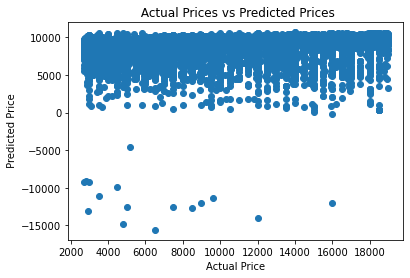

In [153]:
plt.scatter(y_train,y_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [154]:
# prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [155]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.061869699103450415


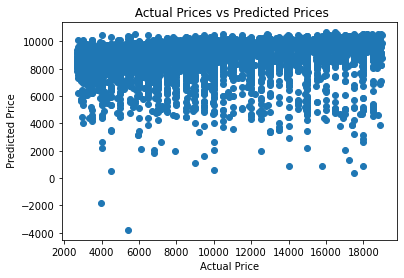

In [156]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [157]:
# # Result of prediction
# data = {'price': y_test,
#        'prediction': y_prediction}
# df_pred = pd.DataFrame(data)

In [158]:
# Loadinf the Linear Regression model
lass_reg_model = Lasso()

In [159]:
#fitting data to the linear Regression model
lass_reg_model.fit(X_train, y_train)

Lasso()

In [160]:
# prediction on Training data
y_prediction = lass_reg_model.predict(X_train)

In [161]:
# R squared Error
error_score = metrics.r2_score(y_train, y_prediction)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.05881806486498942


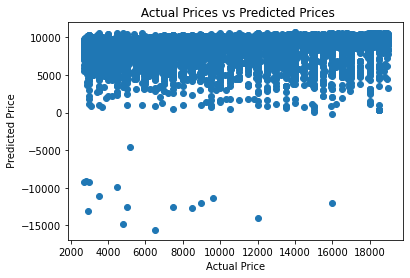

In [162]:
plt.scatter(y_train,y_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [163]:
# prediction on Testing data
test_data_prediction = lass_reg_model.predict(X_test)

In [164]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.06187356456484017


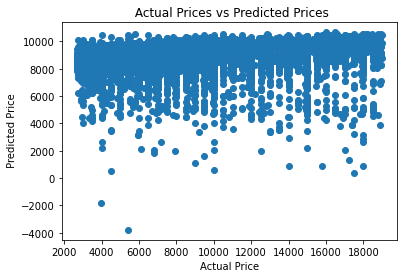

In [165]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [166]:
# # Result of prediction
# data = {'price': y_test,
#        'prediction': y_prediction}
# df_pred = pd.DataFrame(data)